In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
from sklearn.preprocessing import LabelEncoder   # import label encoder
import joblib

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv('train.csv')

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

- Except 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History' , all others are string type
- Also there are missing values in the data

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [8]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
for i in ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area', 'Loan_Status']:
    print(train[i].value_counts(normalize=True))

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64
Yes    0.651391
No     0.348609
Name: Married, dtype: float64
0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64
No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


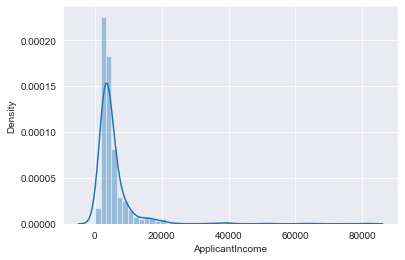

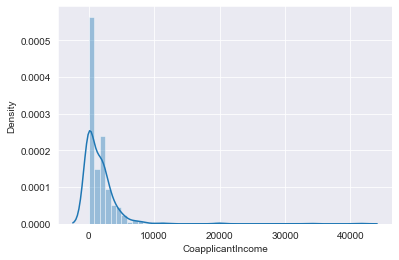

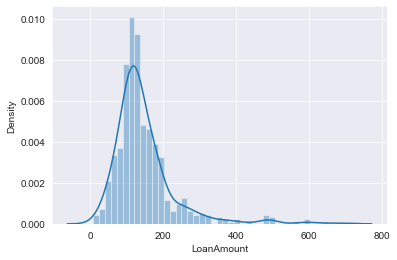

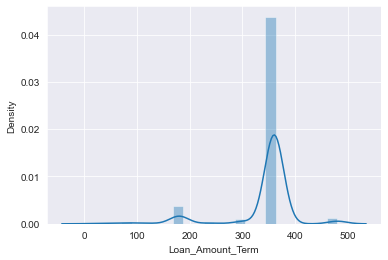

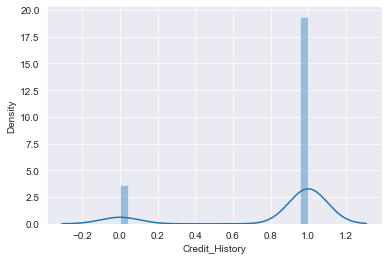

In [11]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']:
    sns.distplot(train[i])
    plt.show()

In [12]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']:
    
    print(i,train[i].nunique())

ApplicantIncome 505
CoapplicantIncome 287
LoanAmount 203
Loan_Amount_Term 10
Credit_History 2


In [13]:
for i in ['Loan_Amount_Term', 'Credit_History']:
    
    print(train[i].value_counts(normalize=True))

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64
1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64


- Credit  history can be considered as a categorical variable
- Loan amount term is very much skewed to 360

In [14]:
train_edit=train.copy()
train_edit['Gender'].fillna(train_edit.Gender.mode()[0],inplace=True)
train_edit['Married'].fillna(train_edit.Married.mode()[0],inplace=True)
train_edit['Dependents'].fillna(train_edit.Dependents.mode()[0],inplace=True)
train_edit['Self_Employed'].fillna(train_edit.Self_Employed.mode()[0],inplace=True)
train_edit['LoanAmount'].fillna(train_edit['LoanAmount'].mean().round(1),inplace=True)
train_edit['Loan_Amount_Term'].fillna(train_edit['Loan_Amount_Term'].mean().round(1),inplace=True)


In [15]:
train_edit['Credit_History'].fillna(train_edit['Credit_History'].mode()[0],inplace=True)

In [ ]:
train_edit.isna().sum()
#train_edit['LoanAmount'].mean().round(1)

In [16]:
train_edit.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [17]:
train_edit.drop('Loan_ID',axis=1,inplace=True)

- As Loan ID doesnot add any information to the model, lets delete that column

In [18]:
for i in ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area', 'Loan_Status', 'Credit_History']:
    train_edit[i]=train_edit[i].astype('category')


In [19]:
train_edit.dtypes

Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History       category
Property_Area        category
Loan_Status          category
dtype: object

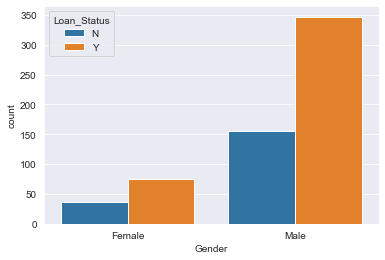

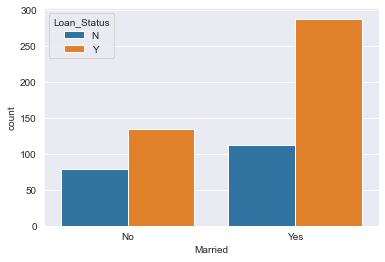

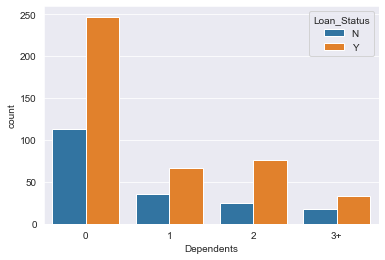

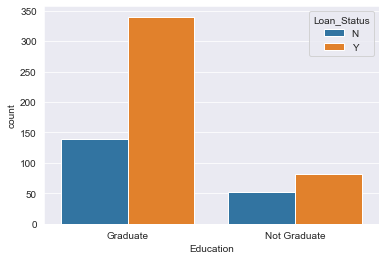

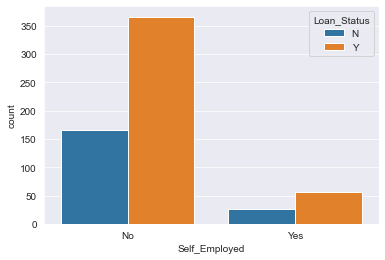

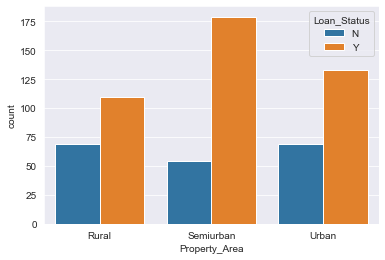

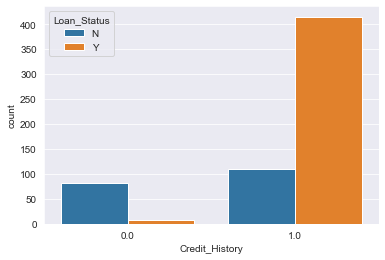

In [20]:
for i in ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area', 'Credit_History']:
    sns.countplot(train_edit[i],hue=train_edit['Loan_Status'])
    plt.show()

<AxesSubplot:>

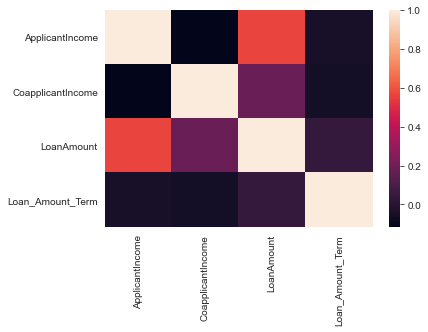

In [21]:
sns.heatmap(train_edit.corr())

In [39]:
train_edit['Loan_Status']=train_edit['Loan_Status'].apply(lambda x: 0 if x=='N' else 1 )

In [131]:
train_edit['Loan_Status'].value_counts(normalize=True)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

- Accuracy of the model should be greater than 69%

In [41]:
## Define X and Y variables

X = train_edit.drop('Loan_Status', axis=1)
Y = train_edit['Loan_Status'].astype('category')     

# change data typr to 'category' because it was object type which is not recognized by model

In [42]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [127]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.4,360.0,1,0,0,0,0,0,0,1,0,1
1,4583,1508.0,128.0,360.0,1,1,1,0,0,0,0,1,0,0
2,3000,0.0,66.0,360.0,1,1,0,0,0,0,1,1,0,1
3,2583,2358.0,120.0,360.0,1,1,0,0,0,1,0,1,0,1
4,6000,0.0,141.0,360.0,1,0,0,0,0,0,0,1,0,1


In [43]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

In [44]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=4294967295,fit_intercept=False)
logreg.fit(X_train, y_train)                    # fit the model on train data

LogisticRegression(fit_intercept=False, random_state=4294967295)

In [139]:
y_predicted = logreg.predict(X_test)
y_predict = np.where(logreg.predict_proba(X_test)<=0.4,1,0)[:,0]             # Predicting the target variable on test data
y_predict

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1])

In [133]:
y_predicted

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [104]:
np.unique(y_predict)

array([0, 1], dtype=int64)

In [134]:
# Observe the predicted and observed classes in a dataframe.

z = X_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Observed Loan Status,Predicted Loan Status
220,2221,0.0,60.0,360.0,1,1,0,0,0,0,0,0,0,1,0,0
109,2071,754.0,94.0,480.0,1,1,0,0,1,1,0,1,1,0,1,1
569,3166,2064.0,104.0,360.0,1,1,0,0,0,0,0,0,0,1,0,0
330,4384,1793.0,117.0,360.0,1,0,1,0,0,0,0,1,0,1,1,1
407,2213,0.0,66.0,360.0,0,0,0,0,0,1,0,1,0,0,1,1


In [124]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.8111888111888111

Testing accuracy 0.8108108108108109

Confusion Matrix


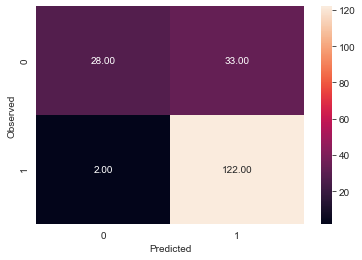

None

Recall: 0.9838709677419355

Precision: 0.7870967741935484

F1 Score: 0.8745519713261649

Roc Auc Score: 0.7214436805922793


In [135]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predicted))
print()
print("Recall:",recall_score(y_test,y_predicted))
print()
print("Precision:",precision_score(y_test,y_predicted))
print()
print("F1 Score:",f1_score(y_test,y_predicted))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predicted))

Trainig accuracy 0.8111888111888111

Testing accuracy 0.8108108108108109

Confusion Matrix


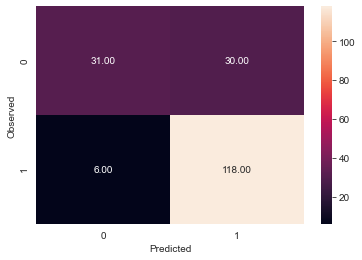

None

Recall: 0.9516129032258065

Precision: 0.7972972972972973

F1 Score: 0.8676470588235293

Roc Auc Score: 0.7299048122686409


In [140]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

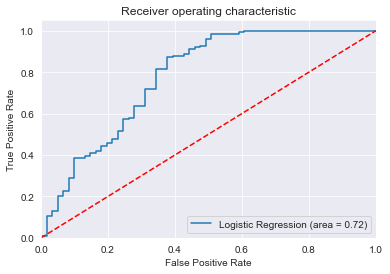

In [130]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [141]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
11,Credit_History_1.0,3.01
12,Property_Area_Semiurban,0.70
9,Education_Not Graduate,0.55
5,Married_Yes,0.42
7,Dependents_2,0.40
6,Dependents_1,0.28
4,Gender_Male,0.22
10,Self_Employed_Yes,0.06
8,Dependents_3+,0.03
13,Property_Area_Urban,0.02


### Business Insights
- Logistic regression: 81% accuracy
- False positives were very high when threshold is 0.5
- We can play with the threshold setting for giving priority to either precision or recall. If we grand loan to a person who can't pay back, it will affect the bank badly. Therefore we should reduce the false positive rate. Thatis we should increase precision. 
- Therefore, i have increased the precisio by reducing the threshold to 0.4
#### Feature Importance

- ApplicantIncome,CoapplicantIncome, Loan amount and Loan amount term has vvery less impact on the mpdel prediction
- Credit History played an important role in orediction
- Property_Area_Semiurban,Education_Not Graduate, Married and dependents alls played an important role in prediction	